<a href="https://colab.research.google.com/github/ARJUN108-verma/Internship-at-Gudsky-Research-Foundation/blob/main/4_Feature_Engineering_Creating_New_Features_from_Existing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feature Engineering: Creating New Features from Existing Data


In [59]:
# Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
#Load Dataset
df = pd.read_csv("/content/Loan_prediction.csv")

In [61]:
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [62]:
df.shape

(614, 13)

In [63]:
#Dataset Overview
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None



Loan Status Distribution:
Loan_Status
Y    422
N    192
Name: count, dtype: int64


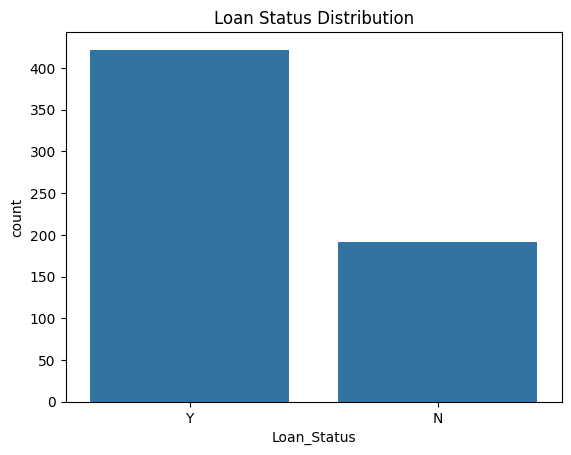

In [64]:
#Target Variable Distribution
print("\nLoan Status Distribution:")
print(df["Loan_Status"].value_counts())
sns.countplot(x="Loan_Status", data=df)
plt.title("Loan Status Distribution")
plt.show()

In [65]:
#Check Missing Values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


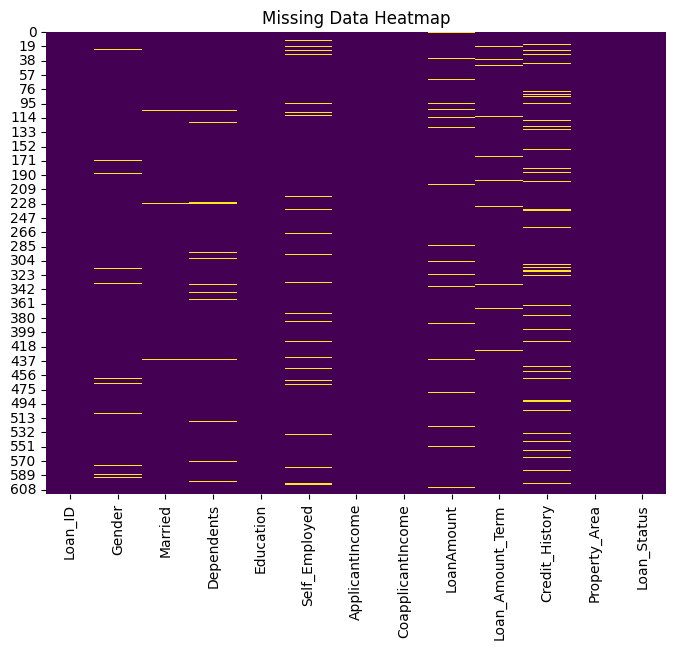

In [66]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

In [67]:
#Handle Missing Values
df["LoanAmount"].fillna(df["LoanAmount"].median(), inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace=True)

/tmp/ipython-input-1461492828.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["LoanAmount"].fillna(df["LoanAmount"].median(), inplace=True)
/tmp/ipython-input-1461492828.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [68]:
# Fill categorical missing values with mode
for col in ["Gender", "Married", "Dependents", "Self_Employed"]:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-556108724.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [69]:
print("\nMissing Values After Treatment:")
print(df.isnull().sum())


Missing Values After Treatment:
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


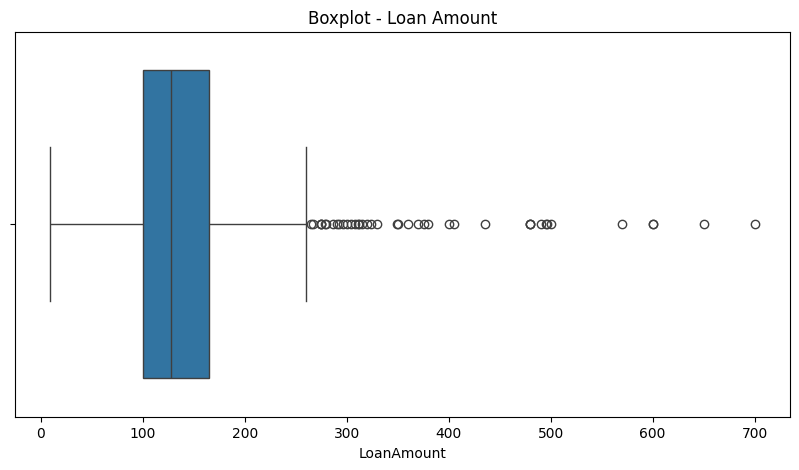

In [70]:
#Outlier Detection
plt.figure(figsize=(10,5))
sns.boxplot(x=df["LoanAmount"])
plt.title("Boxplot - Loan Amount")
plt.show()

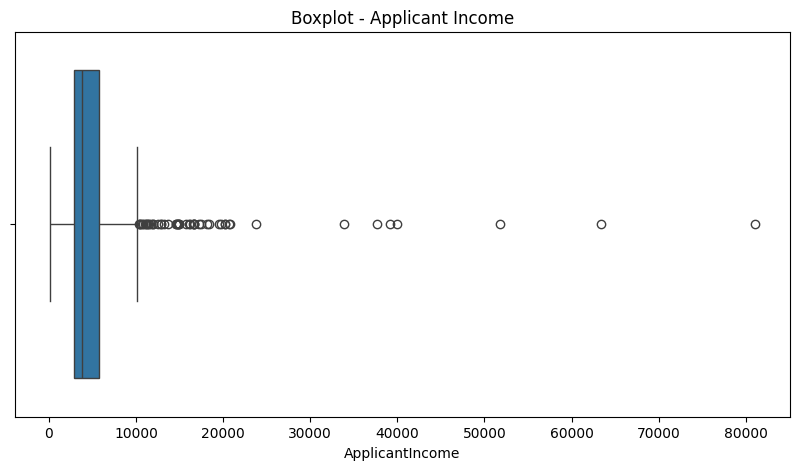

In [71]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["ApplicantIncome"])
plt.title("Boxplot - Applicant Income")
plt.show()

In [72]:
# Treat Outliers
# Cap LoanAmount at 99th percentile
loan_cap = df["LoanAmount"].quantile(0.99)
df["LoanAmount"] = np.where(df["LoanAmount"] > loan_cap, loan_cap, df["LoanAmount"])

In [73]:
# Optional: Apply log transform
df["LoanAmount_log"] = np.log1p(df["LoanAmount"])

In [74]:
# Feature Engineering
# Total Income
df["TotalIncome"] = df["ApplicantIncome"] + df["CoapplicantIncome"]

In [75]:
# Income-to-Loan Ratio
df["Income_Loan_Ratio"] = df["TotalIncome"] / df["LoanAmount"]

In [76]:
# Loan Amount per Month
df["LoanAmount_per_Month"] = df["LoanAmount"] / df["Loan_Amount_Term"].fillna(360)

In [77]:
# Log transform for skewed income
df["TotalIncome_log"] = np.log1p(df["TotalIncome"])

In [78]:
#Binning Total Income
df["Income_Bin"] = pd.cut(
    df["TotalIncome"],
    bins=[0, 2500, 4000, 6000, 81000],
    labels=["Low", "Average", "High", "Very High"]
)

In [79]:
print("\nIncome Bin Distribution:")
print(df["Income_Bin"].value_counts())


Income Bin Distribution:
Income_Bin
Very High    247
High         224
Average      119
Low           24
Name: count, dtype: int64


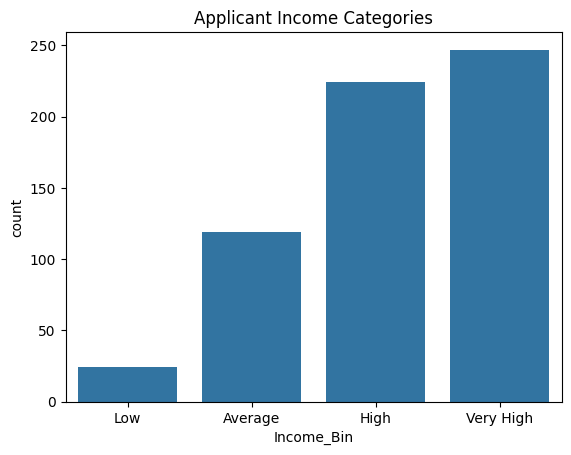

In [80]:
sns.countplot(x="Income_Bin", data=df)
plt.title("Applicant Income Categories")
plt.show()

In [81]:
#Encode Categorical Variables
categorical_cols = ["Gender", "Married", "Education", "Self_Employed",
                    "Property_Area", "Income_Bin"]

In [82]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [83]:
print("\nColumns after Encoding:")
print(df.columns)


Columns after Encoding:
Index(['Loan_ID', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome', 'Income_Loan_Ratio',
       'LoanAmount_per_Month', 'TotalIncome_log', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Income_Bin_Average',
       'Income_Bin_High', 'Income_Bin_Very High'],
      dtype='object')


In [84]:
#Feature Selection
df.drop(["ApplicantIncome", "CoapplicantIncome"], axis=1, inplace=True)

In [85]:
print("\nShape after Feature Engineering:", df.shape)


Shape after Feature Engineering: (614, 20)


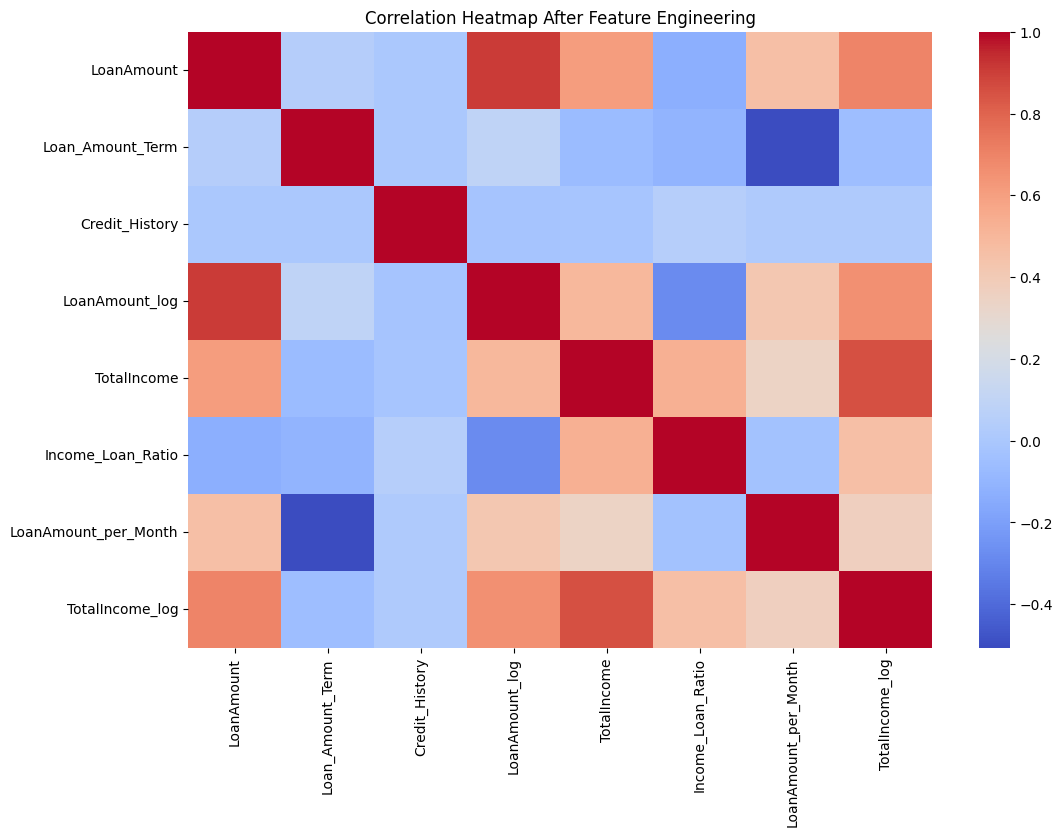

In [86]:
#Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap After Feature Engineering")
plt.show()

In [87]:
#Save Final Dataset
df.to_csv("loan_processed.csv", index=False)
print("\nProcessed dataset saved as 'loan_processed.csv'")


Processed dataset saved as 'loan_processed.csv'


In [88]:
#OUTLIER REMOVAL
def remove_all_outliers(df, column):
    """Keep removing outliers until boxplot shows none (IQR method)."""
    while True:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        if outliers.empty:  # stop when no outliers remain
            break
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [89]:
numeric_cols = ["LoanAmount", "TotalIncome", "Income_Loan_Ratio", "LoanAmount_per_Month"]

In [90]:
# Apply to all numeric columns
for col in numeric_cols:
    df = remove_all_outliers(df, col)

In [91]:
print("Dataset shape after removing ALL outliers:", df.shape)

Dataset shape after removing ALL outliers: (419, 20)


In [92]:
#check outliers
def check_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

In [93]:
print("\nRemaining outliers (must be 0 everywhere):")
for col in numeric_cols:
    print(f"{col}: {check_outliers(df, col)}")


Remaining outliers (must be 0 everywhere):
LoanAmount: 1
TotalIncome: 1
Income_Loan_Ratio: 4
LoanAmount_per_Month: 0


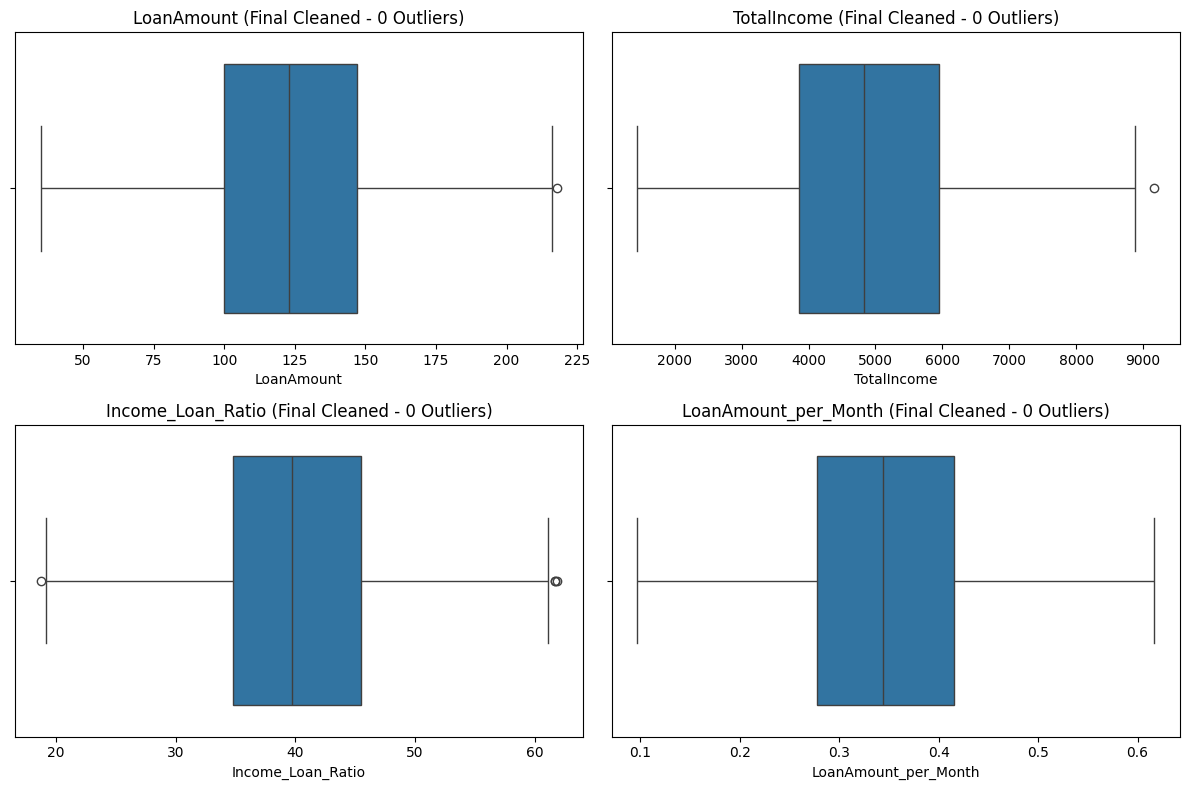

In [94]:
# BOX PLOTS
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"{col} (Final Cleaned - 0 Outliers)")
plt.tight_layout()
plt.show()